In [1]:
import os
import MDAnalysis as md
import MDAnalysis.analysis.rms
import h5py
import numpy as np
import scipy
import matplotlib.pyplot as plt
from MDAnalysis.analysis.base import (AnalysisBase, AnalysisFromFunction, analysis_class)
import matplotlib.pyplot as plt

In [ ]:
# Here we define the number of atoms (in the order H, O, C, N, S) for each mutant (in th order ubiWT, ubi6, ubi20, ubi35, ubi48). This information was achievd by counting the atoms in the pdbs
number_atoms = [[702, 127, 417, 116, 1], [751, 135, 467, 123, 3], [758, 134, 470, 124, 3], [760, 135, 471, 124, 3], [751, 135, 467, 124, 3]]

In [ ]:
# This is the rate at the last energy level (2000 eV), retrieved from Berger et al. (2009)
rates_2000 = [1.111*10**-6, 1.843*10**-2, 6.017*10**-3, 1.107*10**-2, 2.038*10**-2]

In [ ]:
# Here we define the energy steps
energy_steps = [float(i) for i in range(20, 820, 20)] + [float(i) for i in range(850, 1550, 50)] + [float(2000)]

# The rates will be inserted into a matrix (every line represents the atom type)
rates = np.zeros((5, len(energy_steps)))

# For all atom types ...
for k, atom in enumerate(['h', 'o', 'c', 'n', 's']):
    file_name = f"/home/simon/structure_files/cross_section/{atom[0]}.txt"

    #Open the cross sectiion file
    with open(file_name, 'r') as file:
            lines = file.readlines()
            for line in lines:

                # Split the line between rates and energy
                words = line.split()
                rate = float(words[0])
                energy = float(words[1])
                if rate in energy_steps:
                    index = energy_steps.index(rate)
                    rates[k][index] = energy
    rates[k][-1] = rates_2000[k]

In [ ]:
# Now we create a matrix with the rates for all mutants
rates_mutants = np.zeros((5, len(energy_steps)))
for mutant in range(len(rates_mutants)):
    for atom in range(len(rates)):
        rates_mutants[mutant] += (number_atoms[mutant][atom] / sum(number_atoms[mutant])) * rates[atom]

In [ ]:
# This funtion is the averaged rates between all the mutants
mean_rates = np.mean(rates_mutants, axis=0)

In [ ]:
# We find the index of 300 eV, 600 eV and 2000 eV
index_300ev = energy_steps.index(300)
index_600ev = energy_steps.index(600)
index_2000ev = energy_steps.index(2000)

Text(0.5, 1.0, 'Weighted cross section photoionization of the ubiquitins')

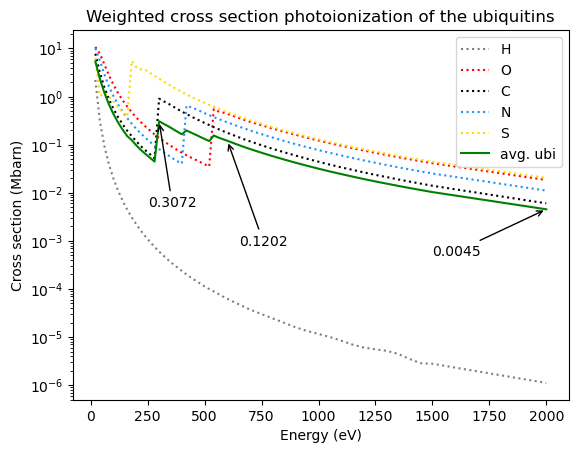

In [ ]:
# For every atom type ...
for k, atom in enumerate(['grey', 'red', 'black', 'dodgerblue', 'gold']):

    # plot the cross section ...
    plt.plot(energy_steps, rates[k], color=atom, linestyle='dotted')

# and then plot the averaged cross section
plt.plot(energy_steps, mean_rates, color='green')
plt.legend(['H', 'O', 'C', 'N', 'S', 'avg. ubi'])

# Mark out the specific energies
plt.annotate(f"{round(mean_rates[index_300ev], 4)}", xy=(300, mean_rates[index_300ev]), xytext=(250, 0.005), arrowprops=dict(arrowstyle='->', lw=1))
plt.annotate(f"{round(mean_rates[index_600ev], 4)}", xy=(600, mean_rates[index_600ev]), xytext=(650, 0.0008), arrowprops=dict(arrowstyle='->', lw=1))
plt.annotate(f"{round(mean_rates[index_2000ev], 4)}", xy=(2000, mean_rates[index_2000ev]), xytext=(1500, 0.0005), arrowprops=dict(arrowstyle='->', lw=1))

# Present the data in a logarithmic scale
plt.yscale('log')

plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (Mbarn)')
plt.title('Weighted cross section photoionization of the ubiquitins')